In [1]:
#lxml

Scraping Time for lxml: 1.704195499420166 seconds
(99, 5)
                                           Book Name              Author  \
0  I Don't Love You Anymore: Moving On and Living...       Rithvik Singh   
1  MINtile Sank Magic Practice Copybook, (4 Book ...          Sank Magic   
2  My First Library: Boxset of 10 Board Books for...  Wonder House Books   
3  The Satvic Revolution: 7 Life-changing Habits ...         Subah Saraf   
4                         Amma Diarylo Konni Pageelu         Ravi Mantri   

               Rating Customers Rated    Price  
0  4.1 out of 5 stars             195  ₹159.00  
1  4.0 out of 5 stars           2,273   ₹79.00  
2  4.5 out of 5 stars          78,676  ₹399.00  
3  4.6 out of 5 stars              10  ₹331.00  
4  4.9 out of 5 stars             327  ₹200.00  
Book Name          0
Author             0
Rating             0
Customers Rated    0
Price              0
dtype: int64
                                            Book Name  \
0   I Don't Love

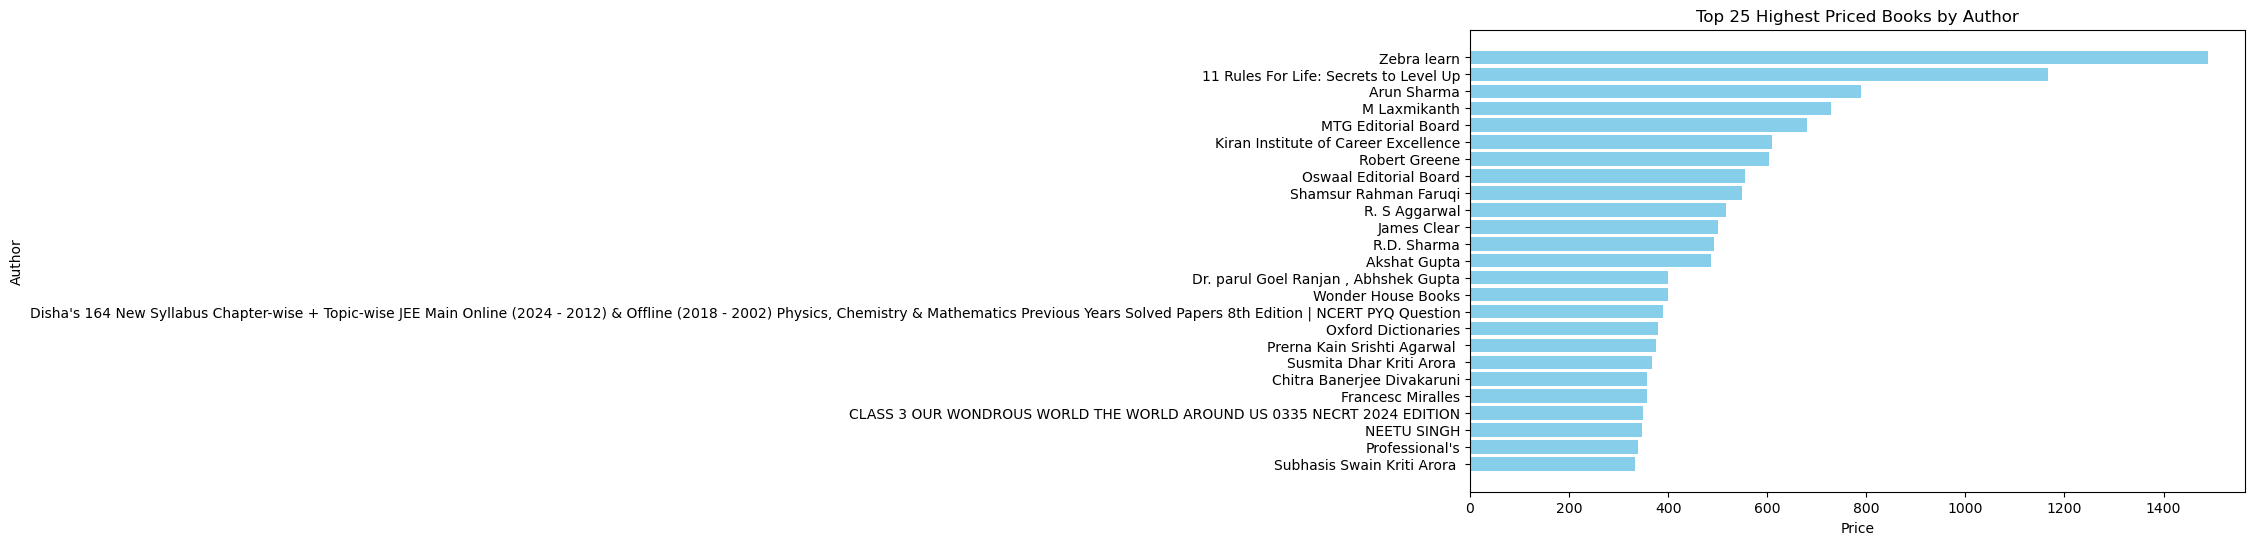

                                            Book Name  \
48                                      Dale Carnegie   
69                                      The Right Guy   
4                          Amma Diarylo Konni Pageelu   
20            Shrimad Bhagwat Geeta Yatharoop (Hindi)   
89  CLASS 6 POORVI TEXTBOOK OF ENGLISH CLASS 6 NCE...   
77          Bhagvad Gita As It Is English New Edition   
75          Bhagvad Gita As It Is English New Edition   
96  Shlokas and Mantras For Kids Illustrated Padde...   
46                                      Chetan Bhagat   
63                                      The Alchemist   
32                     The Magic Of The Lost Temple**   
33  Indian Polity for UPSC (English)|7th Edition|C...   
38                                  Aditya Ranjan Sir   
45                                      Disha Experts   
49    THE 48 LAWS OF POWER [Paperback] Greene, Robert   
74  MTG International Mathematics Olympiad (IMO) W...   
26                 The Naga War

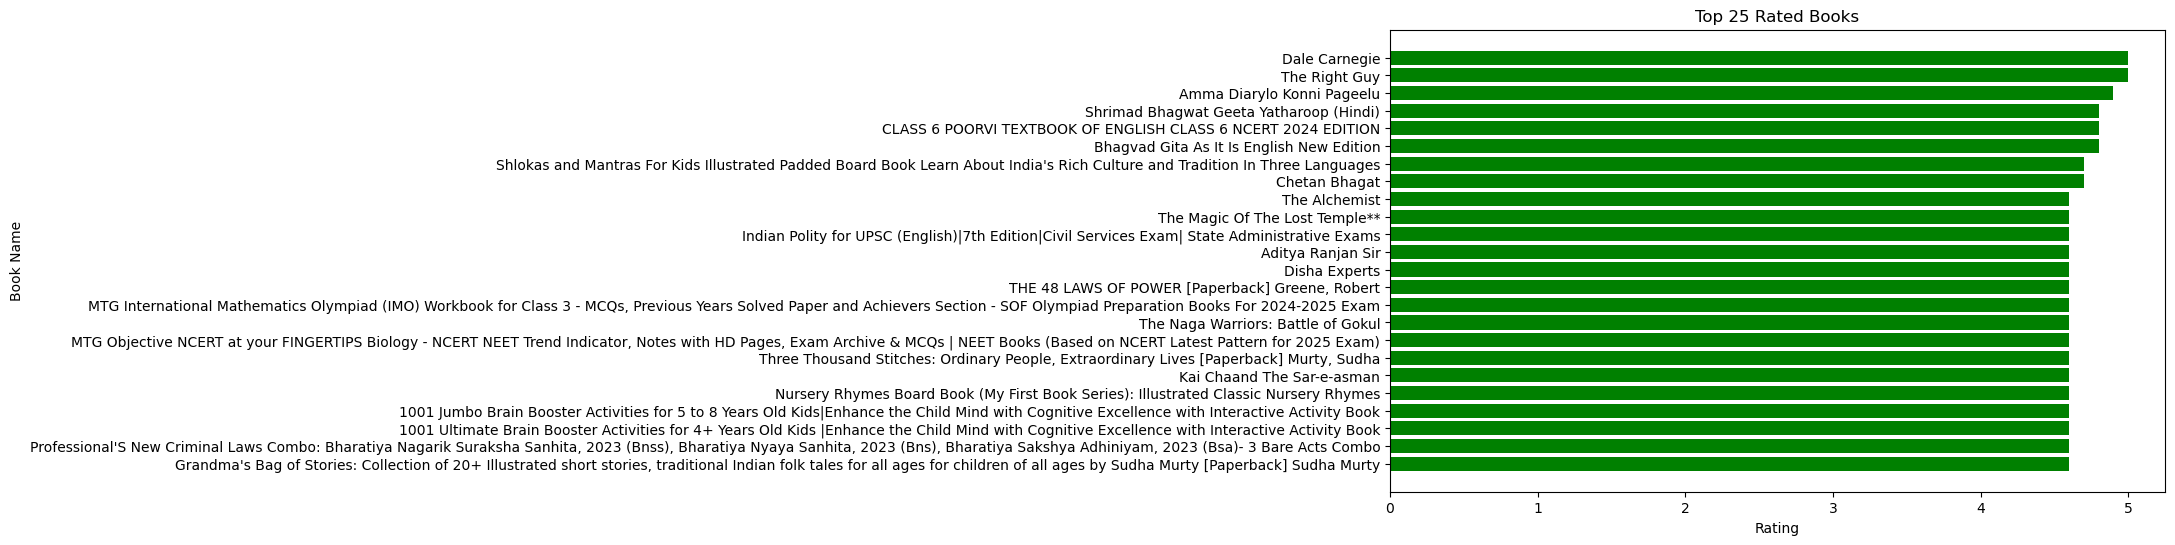

                                            Book Name  \
25   THE SILENT PATIENT [Paperback] Michaelides, Alex   
63                                      The Alchemist   
6                                       Atomic Habits   
2   My First Library: Boxset of 10 Board Books for...   
61      Think and Grow Rich: THE 21st CENTURY EDITION   
40                                    Library Mindset   
8                             The Psychology of Money   
11                                             Ikigai   
35                                      The 5 AM Club   
43        Rashmi Gupta Heena Sharma , Subhankar Vats    
76  Deep Work: Rules for Focused Success in a Dist...   
9   My First Book of Patterns Pencil Control: Patt...   
47                                          Anonymous   
79  Attitude is Everything change your attitude ch...   
19  Grandma's Bag of Stories: Collection of 20+ Il...   

                                               Author  Rating  \
25                    

In [2]:
import requests
from lxml import html
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from bokeh.palettes import d3
from bokeh.plotting import figure, show, output_file
from bokeh.models import NumeralTickFormatter

# 1. Import Necessary Libraries
# (Already done above)

# 2. Scraping the Amazon Best Selling Books (100 Books)
url_list = [
    'https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_1',
    'https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_2_books?ie=UTF8&pg=2'
]

def scrap_lxml():
    scrape_start_time = time.time()  # Start timer for scraping
    books_data = []

    for url in url_list:
        response = requests.get(url)
        tree = html.fromstring(response.content)

        # Extracting book data using XPath
        book_author = tree.xpath('//div[@class="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y"]/text()')
        book_name = []
        author_name = []

        for i in range(int(len(book_author) / 2)):
            book_name.append(book_author[i * 2])
            author_name.append(book_author[i * 2 + 1])
        
        rating = tree.xpath('//span[@class="a-icon-alt"]/text()')
        customer_rated = tree.xpath('//span[@class="a-size-small"]/text()')
        price = tree.xpath('//span[@class="p13n-sc-price"]/text()')

        # Ensuring all lists are of equal length
        min_length = min(len(book_name), len(author_name), len(rating), len(customer_rated), len(price))

        book_name = book_name[:min_length]
        author_name = author_name[:min_length]
        rating = rating[:min_length]
        customer_rated = customer_rated[:min_length]
        price = price[:min_length]

        data = {
            'Book Name': book_name,
            'Author': author_name,
            'Rating': rating,
            'Customers Rated': customer_rated,
            'Price': price
        }

        new_df = pd.DataFrame(data)
        books_data.append(new_df)

    # 3. Using collected data create a CSV file (amazon_book_lxml.csv)
    df = pd.concat(books_data, ignore_index=True)
    file_name = 'amazon_book_lxml.csv'
    df.to_csv(file_name, index=False)  # Save DataFrame to a CSV file

    scrape_end_time = time.time()  # End timer for scraping
    print(f'Scraping Time for lxml: {scrape_end_time - scrape_start_time} seconds')

    preprocess(file_name)
    end_time = time.time()
    print(f'Processing Time for lxml (Full Script): {end_time - full_start_time} seconds')

# 4. Reading the CSV File; and show the size, and head of the CSV file
def preprocess(file):
    data = pd.read_csv(file)
    print(data.shape)
    print(data.head())

    # 5. EDA on the collected CSV data:
    # Pre-processing on the Rating, Customers Rated, and Price column.
    # Example:
    # Rating: should be a number only.
    # Customers Rated: comma should be taken out and it should be an integer (how many customers rated this book)
    # Price: comma and symbols should be taken out and it should also be a number

    # Drop rows where both 'Price' and 'Rating' are NaN
    data = data.dropna(subset=['Price', 'Rating'], how='all')

    # Ensure 'Price' is treated as string before replacing and converting
    data['Price'] = data['Price'].astype(str)

    # Replace '₹' and ',' in 'Price', then convert to float
    data['Price'] = data['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

    # Convert 'Rating' to float
    data['Rating'] = data['Rating'].str.extract(r'(\d\.\d)').astype(float)

    # Fill NaNs in 'Customers Rated' with 0 and convert to int
    data['Customers Rated'] = data['Customers Rated'].str.replace(',', '').fillna('0').astype(int)

    print(data.isna().sum())
    print(data)

    # 6. Check NaNs and take care of NaNs (May be drop the NaNs)
    # (Already handled above by dropping rows where both 'Price' and 'Rating' are NaN)

    # 7. List the Authors Highest Priced Book (i.e., based on price): show your result (at least top 25 highest priced book) as a data frame as well as a Bar diagram.
    highest_priced_books = data.groupby('Author').agg({'Price': 'max'}).reset_index()
    highest_priced_books = highest_priced_books.sort_values(by='Price', ascending=False).head(25)
    print(highest_priced_books)

    plt.figure(figsize=(10, 6))
    plt.barh(highest_priced_books['Author'], highest_priced_books['Price'], color='skyblue')
    plt.xlabel('Price')
    plt.ylabel('Author')
    plt.title('Top 25 Highest Priced Books by Author')
    plt.gca().invert_yaxis()
    plt.show()

    # 8. Show top Rated Books and Authors with respect to the highest customers rating (i.e., based on rating score): Show your result as a data frame as well as a Bar diagram.
    top_rated_books = data.sort_values(by='Rating', ascending=False).head(25)
    print(top_rated_books)

    plt.figure(figsize=(10, 6))
    plt.barh(top_rated_books['Book Name'], top_rated_books['Rating'], color='green')
    plt.xlabel('Rating')
    plt.ylabel('Book Name')
    plt.title('Top 25 Rated Books')
    plt.gca().invert_yaxis()
    plt.show()

    # 9. Show topmost (10/15) Customer Rated Authors and Books (i.e., based on number of customers): Show your result as a data frame as well as a bokeh.palettes, d3
    # (https://docs.bokeh.org/en/latest/docs/reference/palettes.html)
    top_customer_rated_books = data.sort_values(by='Customers Rated', ascending=False).head(15)
    print(top_customer_rated_books)

    output_file("top_customer_rated_books_lxml.html")
    p = figure(y_range=top_customer_rated_books['Book Name'], height=800, width=1200, title="Top 15 Customer Rated Books",
               toolbar_location=None, tools="")
    p.hbar(y=top_customer_rated_books['Book Name'], right=top_customer_rated_books['Customers Rated'], height=0.4, color=d3['Category20'][15])
    p.xaxis.axis_label = "Customers Rated"
    p.yaxis.axis_label = "Book Name"
    p.ygrid.grid_line_color = None
    p.xaxis.formatter = NumeralTickFormatter(format="0,0")

    show(p)

# 10. Complete the above tasks using at least three separate web scraping packages and compare their performance (processing time).
if __name__ == "__main__":
    full_start_time = time.time()  # Start timer for the full script
    scrap_lxml()

    